Notes Document:


# Data/Imports


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install rfpimp
!pip install mord


Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10649 sha256=0c7fd243a24788431e344197be5404f37a9191a563b2ce3c4d5de66cf4773054
  Stored in directory: /root/.cache/pip/wheels/6a/12/08/d5bc35127c8d69d39c1f3736a95419ab4763cc0c80ed65bf41
Successfully built rfpimp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9885 sha256=b22c3eefd4003c87c3d7f97a65bf2d6b07699b4253d27764baf044a0a0c1cb0c
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats
import sklearn
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer,recall_score, roc_curve, roc_auc_score
from tensorflow import keras
from sklearn import linear_model
from scipy.stats import chi2


import statsmodels.api as sm
from scipy.stats import spearmanr

import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



import json
import urllib.request as ur
from collections import Counter
from io import BytesIO
from math import ceil, pi
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
from mord import LogisticAT




### General Data Description - features


In [ ]:
ply_features = pd.read_csv("/content/drive/MyDrive/AqualabValidation_Zach/featuredata/AQUALAB_20220601_to_20220715_c2ad3af_player-features.tsv", sep = "	").dropna()
ply_features.head()



,PlayerID,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionDuration,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,...,job55_JobsAttempted-std-dev-per-attempt,job55_JobsAttempted-job-difficulties,job56_JobsAttempted,job56_JobsAttempted-job-name,job56_JobsAttempted-num-starts,job56_JobsAttempted-num-completes,job56_JobsAttempted-percent-complete,job56_JobsAttempted-avg-time-per-attempt,job56_JobsAttempted-std-dev-per-attempt,job56_JobsAttempted-job-difficulties
1,PetiteYahoo,0:10:18,['coral-stressed'],1.0,0:12:41,0.0,1.0,player,1.0,4.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
3,ModestOpera,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
4,FilmyQueen,"1 day, 2:00:15","['kelp-energy', 'coral-turtle-population', 'di...",2.0,"1 day, 2:21:02",0.0,20.0,player,6.0,12.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
5,DarkenedValue,0:01:14,[],0.0,0:01:14,0.0,1.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."
6,HatefulDuffel,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,...,0.0,"{""experimentation"": 0, ""modeling"": 0, ""argumen...",56.0,arctic-endangered-seals,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen..."


In [ ]:
ply_features = ply_features.loc[ply_features.PlayerID.isna() != True]

ply_features.describe()

,SessionDiveSitesCount,SessionGuideCount,SessionHelpCount,SessionJobsCompleted,SwitchJobsCount,job0_JobActiveTime,job1_JobActiveTime,job2_JobActiveTime,job3_JobActiveTime,job4_JobActiveTime,...,job55_JobsAttempted-num-completes,job55_JobsAttempted-percent-complete,job55_JobsAttempted-avg-time-per-attempt,job55_JobsAttempted-std-dev-per-attempt,job56_JobsAttempted,job56_JobsAttempted-num-starts,job56_JobsAttempted-num-completes,job56_JobsAttempted-percent-complete,job56_JobsAttempted-avg-time-per-attempt,job56_JobsAttempted-std-dev-per-attempt
count,501.000000,501.0,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0,501.000000,...,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0,501.0
mean,2.816367,0.0,5.063872,3.393214,8.964072,151.281437,-276.674651,45.658683,0.0,98.722555,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
std,2.361824,0.0,7.706615,3.951085,9.022567,619.487597,11018.288489,214.019946,0.0,245.010214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-246199.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
50%,2.000000,0.0,2.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
75%,5.000000,0.0,7.000000,5.000000,13.000000,71.000000,255.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0
max,10.000000,0.0,71.000000,29.000000,62.000000,11920.000000,3771.000000,3022.000000,0.0,2605.000000,...,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ply_features.shape

(501, 1272)

In [ ]:
id_col = ['PlayerID']
job_col = []
aggr_col = []
for col in ply_features.columns:
  pieces = col.split('_')
  prefix = pieces[0]
  if prefix.startswith('job'):
    job_col.append(pieces[1])
  else:
    aggr_col.append(col)
job_col = Counter(job_col)
print(f"{len(ply_features.columns)} perjobfeatures in {len(job_col)} groups:")
pprint(job_col, compact=False)

job_col = [key for key in job_col.keys() if key.startswith('Job')]
pprint(job_col)


1272 perjobfeatures in 22 groups:
Counter({'JobActiveTime': 57,
         'JobArgumentationTime': 57,
         'JobCompletionTime': 57,
         'JobDiveSitesCount': 57,
         'JobDiveTime': 57,
         'JobExperimentationTime': 57,
         'JobGuideCount': 57,
         'JobHelpCount': 57,
         'JobHelpCount-ByTask': 57,
         'JobLocationChanges': 57,
         'JobLocationChanges-ByTask': 57,
         'JobModelingTime': 57,
         'JobTasksCompleted': 57,
         'SyncCompletionTime': 57,
         'JobsAttempted': 57,
         'JobsAttempted-job-name': 57,
         'JobsAttempted-num-starts': 57,
         'JobsAttempted-num-completes': 57,
         'JobsAttempted-percent-complete': 57,
         'JobsAttempted-avg-time-per-attempt': 57,
         'JobsAttempted-std-dev-per-attempt': 57,
         'JobsAttempted-job-difficulties': 57})
['JobActiveTime',
 'JobArgumentationTime',
 'JobCompletionTime',
 'JobDiveSitesCount',
 'JobDiveTime',
 'JobExperimentationTime',
 'JobGuideC

In [ ]:
aggr_col = aggr_col[1:]
pprint(aggr_col)

['ActiveTime',
 'JobsCompleted',
 'SessionDiveSitesCount',
 'SessionDuration',
 'SessionGuideCount',
 'SessionHelpCount',
 'SessionID',
 'SessionJobsCompleted',
 'SwitchJobsCount',
 'TopJobCompletionDestinations',
 'TopJobSwitchDestinations',
 'TotalArgumentationTime',
 'TotalDiveTime',
 'TotalExperimentationTime',
 'UserAvgSessionDuration',
 'UserSessionCount',
 'UserTotalSessionDuration']


### Data Description - Complexity Scores by Job

In [ ]:
DBexport = json.load(open("/content/drive/MyDrive/AqualabValidation_Zach/DBExport.json"))
Complexity_df = pd.DataFrame(columns=['job_id', 'job_name', 'argumentation', 'experimentation', 'modeling'])
for id, job in enumerate(DBexport.get('jobs')):
  Complexity_df.loc[len(Complexity_df.index)] = [id, job['id'], job['difficulties']['argumentation'],
                                                 job['difficulties']['experimentation'],
                                                 job['difficulties']['modeling']]
Complexity_df.head()

,job_id,job_name,argumentation,experimentation,modeling
0,0,arctic-missing-whale,2,0,0
1,1,arctic-time-of-death,5,0,0
2,2,arctic-whale-csi,0,0,0
3,3,displaced-reef,2,0,0
4,4,hide-n-seek,1,3,4


### Data Description - End Survey Scores

In [ ]:
labels = pd.read_excel("/content/drive/MyDrive/AqualabValidation_Zach/surveydata/Aqualab Practices Survey June 2022 scores final.xlsx",
                       sheet_name='Simplified')
labels = labels.rename({'Modeling_score_max_5)':'Modeling_score_max_5'}, axis='columns')
labels.head()

,user_code,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4
0,SeventhBran,2.0,1.0,0.0
1,HangingWhorl,5.0,3.0,3.0
2,RougeShift,3.0,3.0,3.0
3,VerticalWaist,5.0,2.0,4.0
4,InsecureSample,5.0,4.0,3.0


In [ ]:
df = pd.merge(ply_features, labels, left_on="PlayerID", right_on="user_code", how="inner")
df

,PlayerID,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionDuration,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,...,job56_JobsAttempted-num-starts,job56_JobsAttempted-num-completes,job56_JobsAttempted-percent-complete,job56_JobsAttempted-avg-time-per-attempt,job56_JobsAttempted-std-dev-per-attempt,job56_JobsAttempted-job-difficulties,user_code,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4
0,SeventhBran,"4 days, 23:53:09","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",5.0,"5 days, 0:15:21",0.0,1.0,player,4.0,11.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",SeventhBran,2.0,1.0,0.0
1,CheerfulSalt,"4 days, 0:32:04","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",6.0,"4 days, 0:47:56",0.0,13.0,player,6.0,18.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",CheerfulSalt,5.0,1.0,1.0
2,FervidClinic,0:28:51,"['kelp-shop-welcome', 'kelp-energy', 'kelp-wel...",4.0,0:53:54,0.0,23.0,player,4.0,11.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",FervidClinic,4.0,1.0,4.0
3,InsecureSample,"3 days, 23:55:08","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",6.0,"4 days, 0:16:56",0.0,3.0,player,6.0,18.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",InsecureSample,5.0,4.0,3.0
4,RuinousMap,"4 days, 0:01:15","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",7.0,"4 days, 0:54:53",0.0,10.0,player,9.0,23.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",RuinousMap,5.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,DesirousRole,0:06:40,"['arctic-time-of-death', 'arctic-underneath']",1.0,0:18:10,0.0,2.0,player,2.0,4.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",DesirousRole,2.0,2.0,0.0
165,FewerMink,"4 days, 0:14:13","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",7.0,"4 days, 0:47:18",0.0,6.0,player,10.0,27.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",FewerMink,5.0,2.0,1.0
166,MuteDisk,"3 days, 23:40:48","['kelp-welcome', 'kelp-bull-kelp-forest', 'kel...",4.0,"4 days, 0:30:03",0.0,4.0,player,4.0,12.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",MuteDisk,3.0,3.0,1.0
167,HardLayer,0:00:05,[],0.0,0:00:05,0.0,0.0,player,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,"{""experimentation"": 5, ""modeling"": 4, ""argumen...",HardLayer,0.0,1.0,1.0


Separate Aggregate Features


In [ ]:
aggr_features = ply_features[aggr_col]
aggr_features.head()


,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionDuration,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,TopJobCompletionDestinations,TopJobSwitchDestinations,TotalArgumentationTime,TotalDiveTime,TotalExperimentationTime,UserAvgSessionDuration,UserSessionCount,UserTotalSessionDuration
1,0:10:18,['coral-stressed'],1.0,0:12:41,0.0,1.0,player,1.0,4.0,"{""coral-stressed"": {""coral-casting-shade"": [""P...",{},0:01:32,0:00:10,0:01:41,761.0,2.0,1522.0
3,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,0.0,2.0,0.0
4,"1 day, 2:00:15","['kelp-energy', 'coral-turtle-population', 'di...",2.0,"1 day, 2:21:02",0.0,20.0,player,6.0,12.0,"{""kelp-energy"": {""coral-turtle-population"": [""...",{},0:15:35,0:00:10,0:00:27,24320.5,4.0,97282.0
5,0:01:14,[],0.0,0:01:14,0.0,1.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,74.0,2.0,148.0
6,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,0.0,2.0,0.0


#Preliminary Data Visualization

### Survey Scores

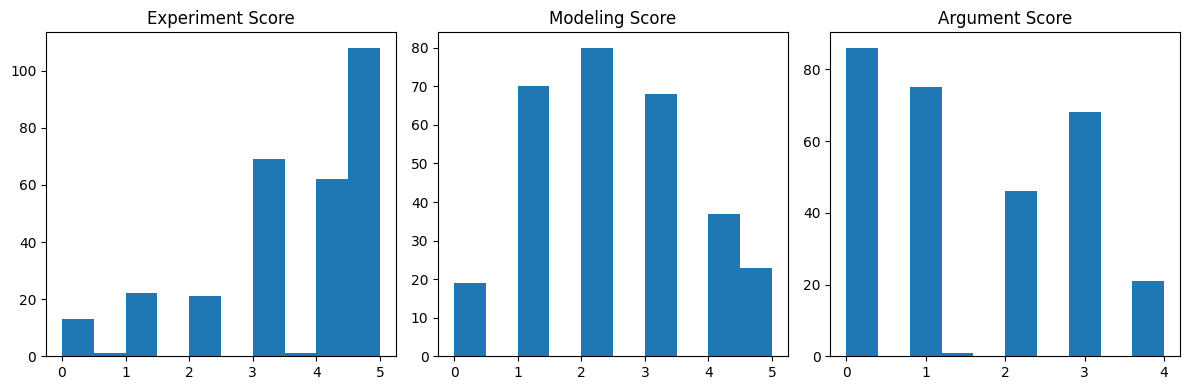

,Experiment_score_max_5,Modeling_score_max_5,Argument_score_max_4
count,297.000000,297.000000,297.000000
mean,3.580161,2.349586,1.538478
std,1.453780,1.339584,1.308179
min,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,4.000000,2.000000,1.000000
75%,5.000000,3.000000,3.000000
max,5.000000,5.000000,4.000000


In [ ]:
experiment_score = labels['Experiment_score_max_5']
modeling_score = labels['Modeling_score_max_5']
argument_score = labels['Argument_score_max_4']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].hist(experiment_score)
axes[0].set_title('Experiment Score')
axes[1].hist(modeling_score)
axes[1].set_title('Modeling Score')
axes[2].hist(argument_score)
axes[2].set_title('Argument Score')

plt.tight_layout()

plt.show()


labels.describe()

# Exploratory Data Visualization

We'll start by looking at some basic plots of correlations between 2 features, as well as Experiment/Modeling/Argument scores

*Inner Join on aggr_features and EMA scores*

In [ ]:
aggr_features

# df_inner = pd.merge(aggr_features, labels, left_on = 'PlayerID', right_on = 'user_code', how='inner').drop('user_code', axis = 1)
# df_inner.head()

,ActiveTime,JobsCompleted,SessionDiveSitesCount,SessionDuration,SessionGuideCount,SessionHelpCount,SessionID,SessionJobsCompleted,SwitchJobsCount,TopJobCompletionDestinations,TopJobSwitchDestinations,TotalArgumentationTime,TotalDiveTime,TotalExperimentationTime,UserAvgSessionDuration,UserSessionCount,UserTotalSessionDuration
1,0:10:18,['coral-stressed'],1.0,0:12:41,0.0,1.0,player,1.0,4.0,"{""coral-stressed"": {""coral-casting-shade"": [""P...",{},0:01:32,0:00:10,0:01:41,761.0,2.0,1522.0
3,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,0.0,2.0,0.0
4,"1 day, 2:00:15","['kelp-energy', 'coral-turtle-population', 'di...",2.0,"1 day, 2:21:02",0.0,20.0,player,6.0,12.0,"{""kelp-energy"": {""coral-turtle-population"": [""...",{},0:15:35,0:00:10,0:00:27,24320.5,4.0,97282.0
5,0:01:14,[],0.0,0:01:14,0.0,1.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,74.0,2.0,148.0
6,0:00:00,[],0.0,0:00:00,0.0,0.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0:00:14,[],0.0,0:00:45,0.0,0.0,player,0.0,1.0,{},{},0:00:00,0:00:00,0:00:00,45.0,2.0,90.0
1867,0:00:18,[],0.0,0:00:18,0.0,0.0,player,0.0,0.0,{},{},0:00:00,0:00:00,0:00:00,18.0,2.0,36.0
1868,0:12:28,['kelp-welcome'],1.0,0:26:55,0.0,3.0,player,1.0,2.0,{},{},0:01:27,0:00:17,0:00:19,1615.0,2.0,3230.0
1869,0:03:37,[],0.0,0:05:19,0.0,1.0,player,0.0,3.0,{},{},0:00:00,0:00:00,0:00:00,319.0,2.0,638.0


NameError: ignored

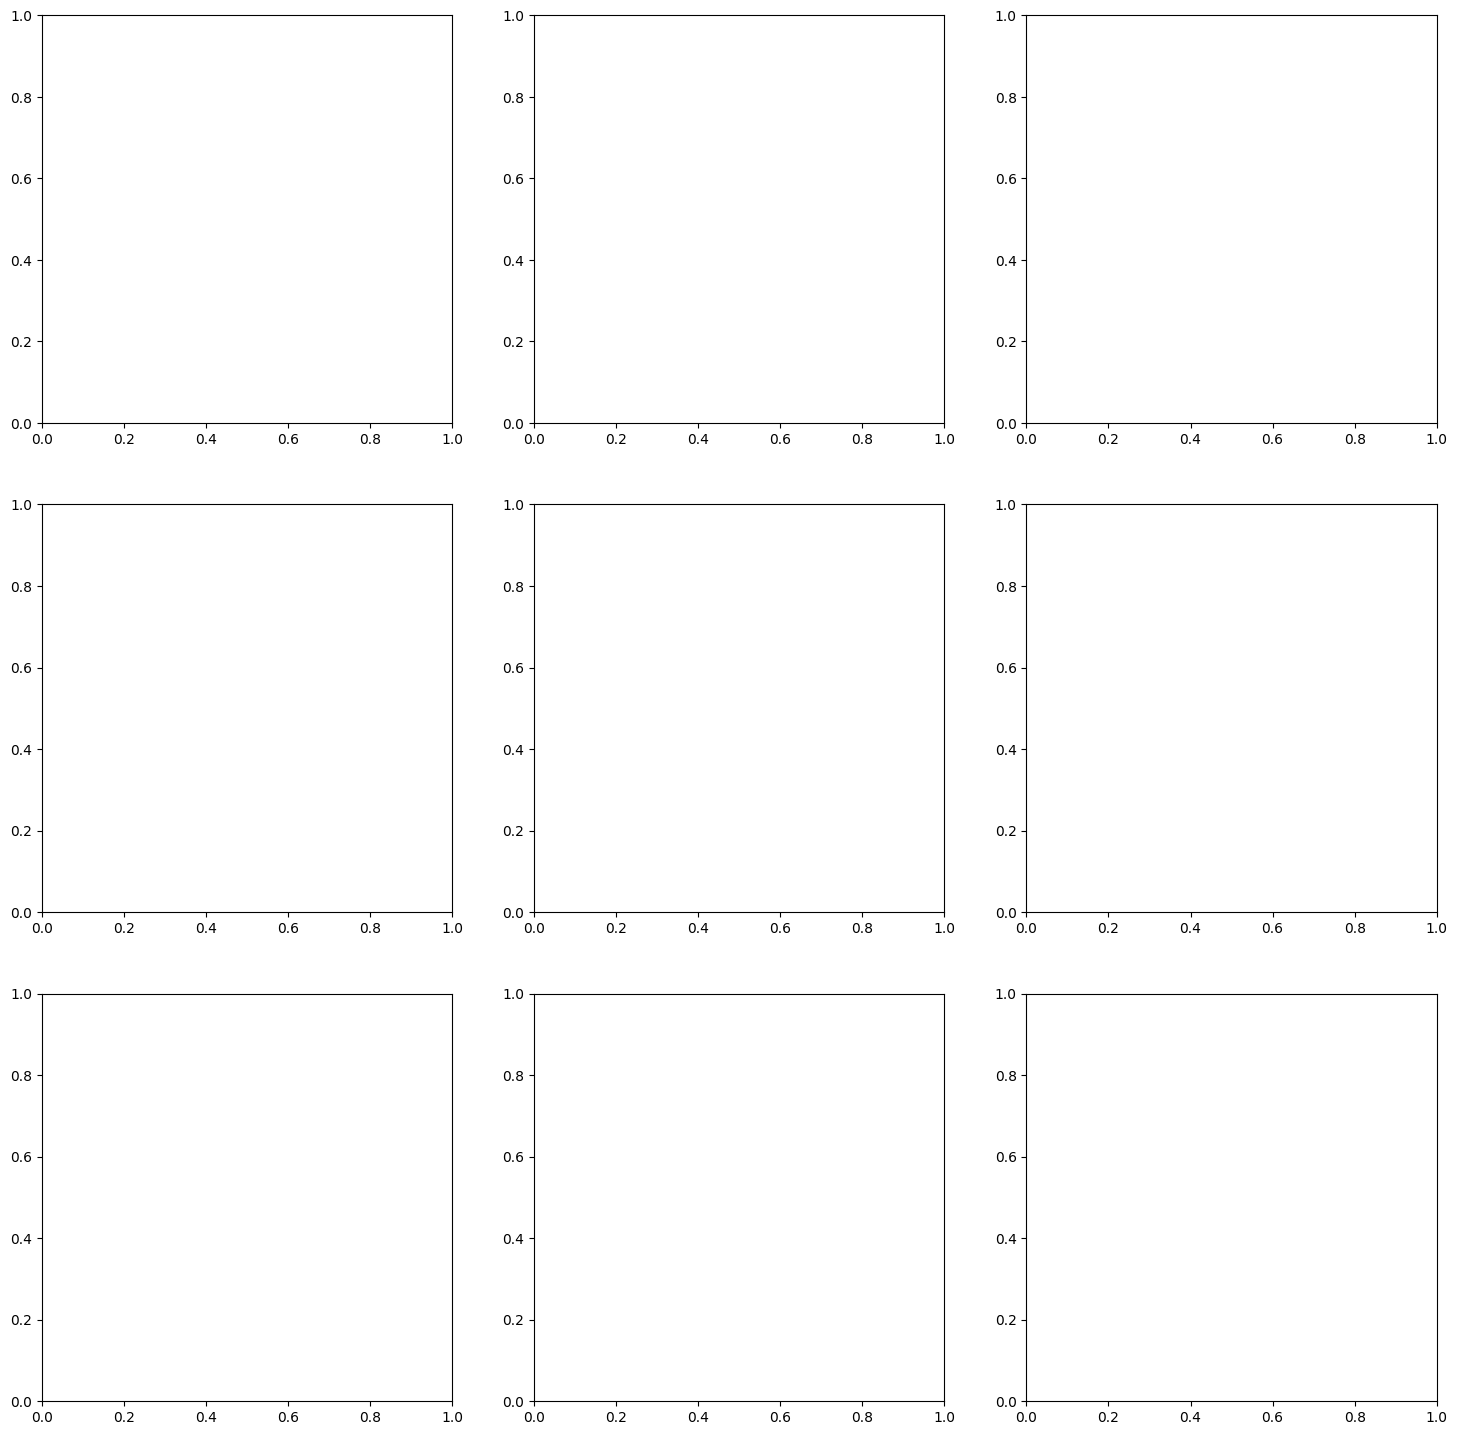

In [ ]:
# Assuming 'df_inner' is the DataFrame containing the data
vars_list = ['Argument_score_max_4', 'Modeling_score_max_5', 'Experiment_score_max_5']
features_list = ['SessionJobsCompleted', 'SessionDiveSitesCount', 'SessionHelpCount']  # List of features to iterate over
n_rows = len(vars_list)
n_cols = len(features_list)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))

# Plot the box plots
for i, var in enumerate(vars_list):
    for j, feature in enumerate(features_list):
        sns.boxplot(x=var, y='value', data=df_inner.melt(id_vars=var, value_vars=[feature]), ax=axes[i, j])
        axes[i, j].set_ylabel(var)
        axes[i, j].set_xlabel(feature)

# Adjust spacing between subplots
plt.tight_layout()

# Display the box plots
plt.show()

Seems like we could use more feature data on specific aspects of receiving facts and modeling- I don't see anything related to this in the Aqualab JSON schema in the repo, so maybe some feature work needs to be done. It seems like some features may have been lost from the original file used by Haishuo as well(ex. totalfactsreceieved). Neither ModelingFactsReceieved or ExperimentFactsReceieved, which were identified by Haishuo as most important, exist in the data

## Correlation Heatmap


                        SessionDiveSitesCount  SessionHelpCount  \
SessionDiveSitesCount                1.000000          0.495985   
SessionHelpCount                     0.495985          1.000000   
SessionJobsCompleted                 0.813603          0.443122   
SwitchJobsCount                      0.849631          0.494500   
UserAvgSessionDuration               0.073903          0.025241   

                        SessionJobsCompleted  SwitchJobsCount  \
SessionDiveSitesCount               0.813603         0.849631   
SessionHelpCount                    0.443122         0.494500   
SessionJobsCompleted                1.000000         0.964690   
SwitchJobsCount                     0.964690         1.000000   
UserAvgSessionDuration              0.033541         0.037731   

                        UserAvgSessionDuration  
SessionDiveSitesCount                 0.073903  
SessionHelpCount                      0.025241  
SessionJobsCompleted                  0.033541  
SwitchJobs

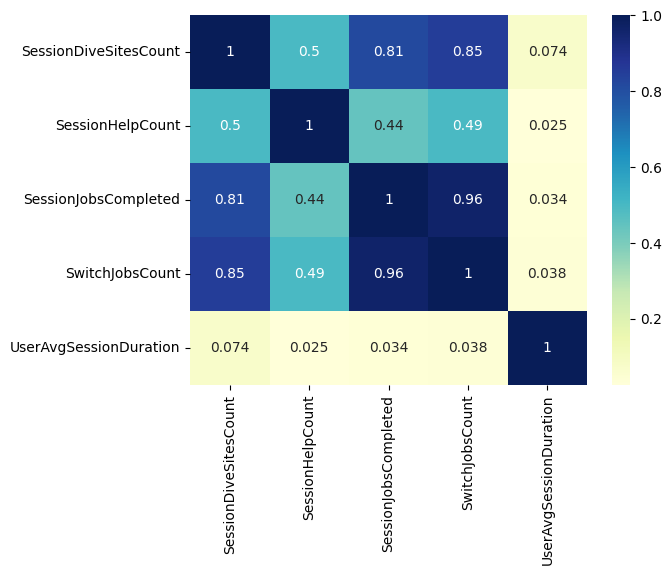

In [ ]:
discrete_features=["SessionDiveSitesCount","SessionHelpCount", "SessionJobsCompleted", "SwitchJobsCount","UserAvgSessionDuration"]
aggr_features.head()
correlation_matrix = aggr_features[discrete_features]
pprint(correlation_matrix.corr())
# plotting correlation heatmap
dataplot = sns.heatmap(correlation_matrix.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## Basic Linear Regressions

In [ ]:
# create df, clean data, keep only discrete numerical values
e_predict_data = pd.merge(aggr_features[["SessionDiveSitesCount","SessionHelpCount", "SessionJobsCompleted", "SwitchJobsCount","UserAvgSessionDuration","PlayerID"]], labels[["user_code","Experiment_score_max_5"]], left_on = 'PlayerID', right_on = 'user_code', how='inner').drop('user_code', axis = 1)
e_predict_data = e_predict_data.drop("PlayerID", axis=1).fillna(0)
e_predict_data.head(10)

KeyError: ignored

## Permutation Feature Ranking

In [ ]:
features = ["SessionDiveSitesCount","SessionHelpCount", "SessionJobsCompleted", "SwitchJobsCount","Experiment_score_max_5"]

##Train/Test split

df_train, df_test = train_test_split(e_predict_data, test_size=0.20)
df_train = df_train[discrete_features]
df_test = df_test[discrete_features]
df_test
X_train, y_train = df_train.drop('Experiment_score_max_5',axis=1), df_train['Experiment_score_max_5']
X_test, y_test = df_test.drop('Experiment_score_max_5',axis=1), df_test['Experiment_score_max_5']

##Train
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

##Permutation Feature Importance
imp = rfpimp.importances(rf, X_test, y_test)

##Plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

NameError: ignored

This doesn't tell us much right now, but with better data it could give us good insights

In [ ]:
X = e_predict_data['SwitchJobsCount'].values.reshape(-1,1)
y = e_predict_data['SessionDiveSitesCount'].values

## Train model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('SwitchJobsCount', fontsize=14)
ax.set_xlabel('SessionDiveSitesCount', fontsize=14)
ax.text(0.8, 0.1, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

NameError: ignored

In [ ]:
X = e_predict_data['SwitchJobsCount'].values.reshape(-1,1)
y = e_predict_data['SessionHelpCount'].values

## Train model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('SwitchJobsCount', fontsize=14)
ax.set_xlabel('SessionHelpCount', fontsize=14)
ax.text(0.8, 0.1, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

NameError: ignored

In [ ]:
X = e_predict_data['SessionJobsCompleted'].values.reshape(-1,1)
y = e_predict_data['SessionHelpCount'].values

## Train model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('SwitchJobsCount', fontsize=14)
ax.set_xlabel('SessionDiveSitesCount', fontsize=14)
ax.text(0.8, 0.1, '', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

NameError: ignored

# Basic Correlations
We will systematically iterate over all combinations of perjob features and EMA metrics to look for correlation coefficients above a certain level(currently 0.2). As with before, we aren't really finding any basic per-job features with a corr. coeff above 0.25-0.3

In [69]:
best_corrs=[]
job_dict={}
# Iterate over each item
for item in job_col:
    if "Time" not in item and "PlayerID" not in item:
      # Generate 57 entries
      job_dict[item] = []
      for i in range(57):
          entry = f"job{i}_{item}"
          job_dict[item].append(entry)


for job_key, job_val in job_dict.items():
  job_key
  job_val.insert(0, 'PlayerID')
  features = ply_features[job_val].dropna()


  df = pd.merge(features, labels, left_on='PlayerID', right_on='user_code', how='inner').drop('user_code', axis=1)
  print(df)
  correlation_columns = ['Experiment_score_max_5', 'Modeling_score_max_5', 'Argument_score_max_4']

  # Compute the correlation matrix
  corr_values = df.corr()[correlation_columns].dropna()

  corr_values = corr_values.drop(corr_values.tail(3).index)

  #save columns with correlations above 0.2
  for col in corr_values:
    for i in range(len(corr_values[col])):
      if corr_values[col][i] > 0.2:
        print(f'{corr_values[col][i]} | {corr_values[col].index[i]} | {col}')
        best_corrs.append(corr_values[col].index[i])



           PlayerID  job0_JobDiveSitesCount  job1_JobDiveSitesCount  \
0       SeventhBran                     0.0                     2.0   
1      CheerfulSalt                     0.0                     4.0   
2      FervidClinic                     3.0                     5.0   
3    InsecureSample                     2.0                     1.0   
4        RuinousMap                     0.0                     3.0   
..              ...                     ...                     ...   
164    DesirousRole                     0.0                     0.0   
165       FewerMink                     0.0                     4.0   
166        MuteDisk                     0.0                     2.0   
167       HardLayer                     0.0                     0.0   
168        WilyYarn                     0.0                     0.0   

     job2_JobDiveSitesCount  job3_JobDiveSitesCount  job4_JobDiveSitesCount  \
0                       0.0                     0.0                 

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()


           PlayerID job0_JobHelpCount-ByTask  \
0       SeventhBran                       {}   
1      CheerfulSalt                       {}   
2      FervidClinic                       {}   
3    InsecureSample                       {}   
4        RuinousMap                       {}   
..              ...                      ...   
164    DesirousRole                       {}   
165       FewerMink                       {}   
166        MuteDisk                       {}   
167       HardLayer                       {}   
168        WilyYarn                       {}   

                              job1_JobHelpCount-ByTask  \
0                                   {"findTracker": 0}   
1                                   {"findTracker": 2}   
2                                   {"findTracker": 0}   
3                                                   {}   
4                                   {"findTracker": 0}   
..                                                 ...   
164              

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()



           PlayerID  job0_JobTasksCompleted  job1_JobTasksCompleted  \
0       SeventhBran                     0.0                     1.0   
1      CheerfulSalt                     0.0                     1.0   
2      FervidClinic                     0.0                     1.0   
3    InsecureSample                     0.0                     0.0   
4        RuinousMap                     0.0                     1.0   
..              ...                     ...                     ...   
164    DesirousRole                     0.0                     0.0   
165       FewerMink                     0.0                     3.0   
166        MuteDisk                     0.0                     0.0   
167       HardLayer                     0.0                     0.0   
168        WilyYarn                     0.0                     0.0   

     job2_JobTasksCompleted  job3_JobTasksCompleted  job4_JobTasksCompleted  \
0                       0.0                     0.0                

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()


           PlayerID job0_JobsAttempted-job-name job1_JobsAttempted-job-name  \
0       SeventhBran               no-active-job        arctic-missing-whale   
1      CheerfulSalt               no-active-job        arctic-missing-whale   
2      FervidClinic               no-active-job        arctic-missing-whale   
3    InsecureSample               no-active-job        arctic-missing-whale   
4        RuinousMap               no-active-job        arctic-missing-whale   
..              ...                         ...                         ...   
164    DesirousRole               no-active-job        arctic-missing-whale   
165       FewerMink               no-active-job        arctic-missing-whale   
166        MuteDisk               no-active-job        arctic-missing-whale   
167       HardLayer               no-active-job        arctic-missing-whale   
168        WilyYarn               no-active-job        arctic-missing-whale   

    job2_JobsAttempted-job-name job3_JobsAttempted-

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()


           PlayerID  job0_JobsAttempted-num-completes  \
0       SeventhBran                               0.0   
1      CheerfulSalt                               0.0   
2      FervidClinic                               0.0   
3    InsecureSample                               0.0   
4        RuinousMap                               0.0   
..              ...                               ...   
164    DesirousRole                               0.0   
165       FewerMink                               0.0   
166        MuteDisk                               0.0   
167       HardLayer                               0.0   
168        WilyYarn                               0.0   

     job1_JobsAttempted-num-completes  job2_JobsAttempted-num-completes  \
0                                 0.0                               0.0   
1                                 0.0                               0.0   
2                                 0.0                               0.0   
3              

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()


           PlayerID  job0_JobsAttempted-std-dev-per-attempt  \
0       SeventhBran                                     0.0   
1      CheerfulSalt                                     0.0   
2      FervidClinic                                     0.0   
3    InsecureSample                                     0.0   
4        RuinousMap                                     0.0   
..              ...                                     ...   
164    DesirousRole                                     0.0   
165       FewerMink                                     0.0   
166        MuteDisk                                     0.0   
167       HardLayer                                     0.0   
168        WilyYarn                                     0.0   

     job1_JobsAttempted-std-dev-per-attempt  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4       

<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()
<ipython-input-69-1496b0f36efa>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_values = df.corr()[correlation_columns].dropna()


In [71]:
if 'PlayerID' not in best_corrs:
  best_corrs.insert(0, 'PlayerID')
correlation_matrix = ply_features[best_corrs].dropna()

df = pd.merge(correlation_matrix, labels, left_on='PlayerID', right_on='user_code', how='inner')

df

best_corrs

['PlayerID',
 'job36_JobDiveSitesCount',
 'job13_JobHelpCount',
 'job32_JobHelpCount',
 'job15_JobTasksCompleted',
 'job32_JobTasksCompleted',
 'job12_JobTasksCompleted',
 'job13_JobTasksCompleted',
 'job32_JobTasksCompleted',
 'job32_JobsAttempted-num-starts',
 'job36_JobsAttempted-num-starts',
 'job12_JobsAttempted-num-starts',
 'job13_JobsAttempted-num-starts',
 'job32_JobsAttempted-num-starts',
 'job43_JobsAttempted-num-starts',
 'job32_JobsAttempted-num-completes',
 'job13_JobsAttempted-num-completes',
 'job20_JobsAttempted-num-completes',
 'job32_JobsAttempted-num-completes',
 'job32_JobsAttempted-percent-complete',
 'job13_JobsAttempted-percent-complete',
 'job20_JobsAttempted-percent-complete',
 'job32_JobsAttempted-percent-complete',
 'job30_JobsAttempted-avg-time-per-attempt',
 'job32_JobsAttempted-avg-time-per-attempt']

# Linear Regressions with correlated level completion features
Let's look at some of key per-level completion features and check correlation between those features. Then let's put those in a multiple linear regression and see what that looks like

In [ ]:
completed_df = correlation_matrix.filter(like = 'Completed')
correlations = completed_df.corr()
correlations


,job15_JobTasksCompleted,job32_JobTasksCompleted,job12_JobTasksCompleted,job13_JobTasksCompleted,job32_JobTasksCompleted
job15_JobTasksCompleted,1.000000,0.265620,0.422754,0.275729,0.265620
job32_JobTasksCompleted,0.265620,1.000000,0.272219,0.325021,1.000000
job12_JobTasksCompleted,0.422754,0.272219,1.000000,0.602214,0.272219
job13_JobTasksCompleted,0.275729,0.325021,0.602214,1.000000,0.325021
job32_JobTasksCompleted,0.265620,1.000000,0.272219,0.325021,1.000000


Let's take a look at job15, job12, job13 specifically

In [ ]:
mlr = linear_model.LinearRegression()
mlr.fit(df[['job15_JobTasksCompleted','job12_JobTasksCompleted','job13_JobTasksCompleted']], df[['Experiment_score_max_5']])
print(mlr.coef_)
print(mlr.predict([[5,2,30]]))

[[-0.13811217  0.03834408  0.69890543]]
[[23.90688226]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


job13_JobTasksCompleted looks interesting- however, we should keep in mind that the dataset we're looking at contains only a few discrete values in the predictor column(EMA)

In [72]:

# lr = linear_model.LinearRegression()
# lr.fit(X,Y)

# print(lr.coef_)

# # Obtain the predicted values and residuals
# Y_pred = lr.predict(X)
# residuals = Y - Y_pred

# # # Create the residual plot
# # plt.scatter(Y_pred, residuals, color='blue')
# # plt.axhline(y=0, color='red', linestyle='--')
# # plt.xlabel('Predicted Values')
# # plt.ylabel('Residuals')
# # plt.title('Residual Plot')

# # # Display the plot
# # plt.show()

# # Create the scatter plot
# plt.scatter(X, Y, color='blue')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Scatter Plot: X vs Y')

# # Display the plot
# plt.show()

X= df[['job32_JobsAttempted-percent-complete']].astype(int)
Y = df['Modeling_score_max_5'].astype(int)

Y

ord_lr = LogisticAT(alpha=0)  # Set alpha=0 for no regularization
ord_lr.fit(X, Y)

# Print the estimated coefficients
print(ord_lr.coef_)

[0.00916396 0.00916396]


In [ ]:
Y= df[['job32_JobTasksCompleted']].astype(int)
X = df['Modeling_score_max_5'].astype(int)


# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(Y, X)
result = logit_model.fit()

result.summary()


ValueError: ignored

In [ ]:
X = df[['job13_JobTasksCompleted']].astype(int)
Y = df['Experiment_score_max_5'].astype(int)

